# **Objetivo General de la Práctica**
*Desarrollar habilidades para generar variables aleatorias a partir de
diferentes distribuciones mediante el método de la transformada
inversa. Esto permitirá comprender la aplicación del método en
problemas reales donde los tiempos, la demanda y la frecuencia de
eventos aleatorios influyen en el comportamiento de un sistema.*

# **Problema 1: Distribución Binomial**
***Contexto:*** Un distribuidor de artículos electrónicos recibe varios pedidos
diarios. Cada día, el distribuidor tiene una probabilidad de éxito de cumplir
un pedido (es decir, de tener en stock los artículos solicitados) del 70%.
Desea simular la cantidad de pedidos diarios que logra satisfacer para
gestionar adecuadamente sus inventarios y minimizar las faltantes de
stock.

***Objetivo:*** Generar una variable aleatoria que simule el número de pedidos
satisfechos **por día durante una semana**, considerando que cada día el
distribuidor recibe 20 pedidos.


In [74]:
# Alumna: Romero Jiménez Sofía Cristal
# No. Control: 23041077

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Parámetros de la Distribución Binomial
tasa_llegada = 1 / 15  # 1 llegada cada 15 minutos en promedio
horas_operacion = 12
num_muestras = horas_operacion * 4  # 4 llegadas esperadas por hora en promedio

# Generación de datos (Distribución Exponencial)
def exponencial_inverse_transform(lambda_tasa, U):
    """Genera valores Exponenciales con la Transformada Inversa."""
    return -math.log(1 - U) / lambda_tasa

U_exponencial = np.random.uniform(0, 1, num_muestras)
tiempos_entre_llegadas = [exponencial_inverse_transform(tasa_llegada, u) for u in U_exponencial]


In [76]:
# Parámetros del modelo
lambda_llegadas = 10  # Llegadas promedio de clientes por hora (Poisson)
tiempo_servicio_promedio = 15  # Tiempo promedio de servicio en minutos (Exponencial)
lambda_servicio = 1 / tiempo_servicio_promedio  # Tasa para la distribución exponencial

# Generar llegadas de clientes usando la distribución Poisson (transformada inversa)
def poisson_inverse_transform(lambda_poisson, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += (lambda_poisson ** k) * math.exp(-lambda_poisson) / math.factorial(k)
        if U <= F_k:
            return k
        k += 1

# Generar tiempos de servicio usando la distribución Exponencial (transformada inversa)
def exponencial_inverse_transform(lambda_servicio, U):
    return -math.log(1 - U) / lambda_servicio

# Simulación de 8 horas en la tienda departamental
num_horas = 8
num_simulaciones = 100  # Número de simulaciones
llegadas_simuladas = []
servicios_simulados = []

# Simulamos para cada hora
for _ in range(num_horas):
    # Generamos un número de clientes por hora (Poisson)
    U_llegadas = np.random.uniform(0, 1, num_simulaciones)
    llegadas_hora = [poisson_inverse_transform(lambda_llegadas, u) for u in U_llegadas]
    llegadas_simuladas.extend(llegadas_hora)

    # Generamos los tiempos de servicio para cada cliente (Exponencial)
    U_servicio = np.random.uniform(0, 1, len(llegadas_hora))
    tiempos_servicio = [exponencial_inverse_transform(lambda_servicio, u) for u in U_servicio]
    servicios_simulados.extend(tiempos_servicio)

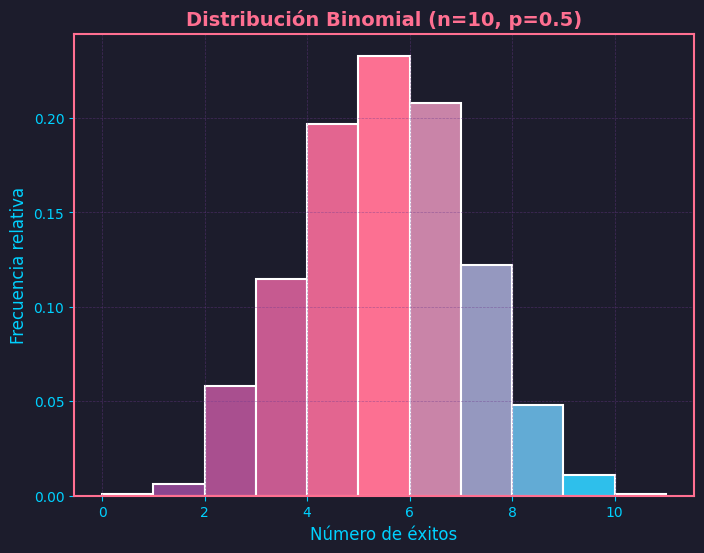

In [77]:
#Diseño de la gráfica
plt.figure(figsize=(8, 6))

azul_jinx = '#1C1C2C'
morado_jinx = '#6E3A8E'
rosa_neon = '#FF6F91'
azul_neon = '#00D1FF'
blanco = '#FFFFFF'

# Colormap personalizado
colors = [morado_jinx, rosa_neon, azul_neon]
cmap = LinearSegmentedColormap.from_list("custom_jinx", colors, N=100)

# Histograma
n, bins, patches = plt.hist(binomial_data, bins=range(min(binomial_data), max(binomial_data) + 2),
                            edgecolor=blanco, linewidth=1.5, density=True)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers)
col /= max(col) if max(col) > 0 else 1
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cmap(c))

# Configuración de la gráfica
plt.title("Distribución Binomial (n=10, p=0.5)", fontsize=14, color=rosa_neon, fontweight='bold')
plt.xlabel("Número de éxitos", fontsize=12, color=azul_neon)
plt.ylabel("Frecuencia relativa", fontsize=12, color=azul_neon)
plt.tick_params(colors=azul_neon)
plt.gca().set_facecolor(azul_jinx)
plt.gcf().set_facecolor(azul_jinx)
for spine in plt.gca().spines.values():
    spine.set_edgecolor(rosa_neon)
    spine.set_linewidth(1.5)
plt.grid(True, linestyle='--', linewidth=0.5, color=morado_jinx, alpha=0.5)

plt.show()